# Exercise 14

cf. [Auto data set documentation](https://islp.readthedocs.io/en/latest/datasets/Auto.html)

In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP import confusion_table
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.model_selection import train_test_split
from ISLP.models import ModelSpec as MS

Auto = load_data("Auto")
Auto.shape, Auto.columns

((392, 9),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'year', 'origin', 'name'],
       dtype='object'))

## a.

In [118]:
select = Auto.mpg > Auto.mpg.median()
mpg01 = np.array(["0"]*Auto.shape[0])
mpg01[select] = "1"
Auto["mpg01"] = mpg01

## b.

In [119]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


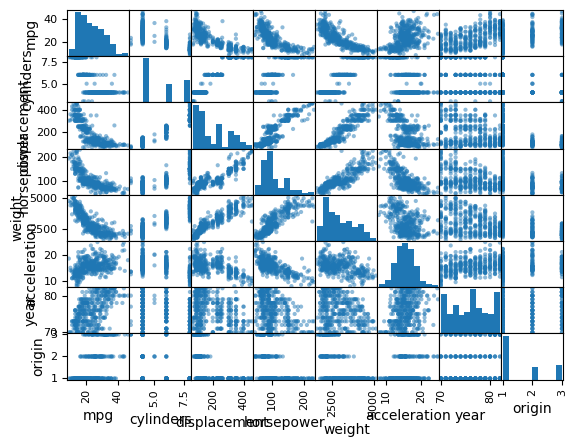

In [120]:
pd.plotting.scatter_matrix(Auto);

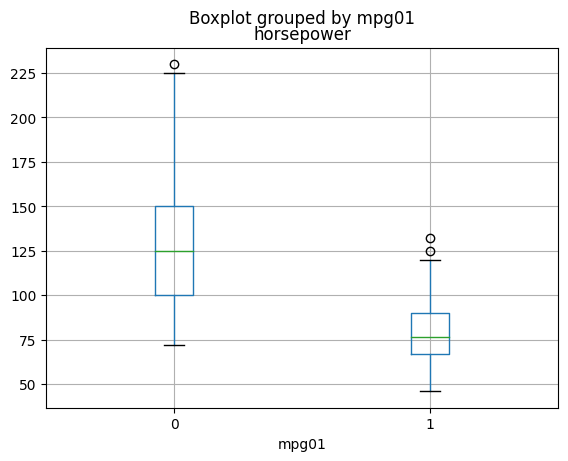

In [121]:
Auto.boxplot(column="horsepower", by="mpg01");

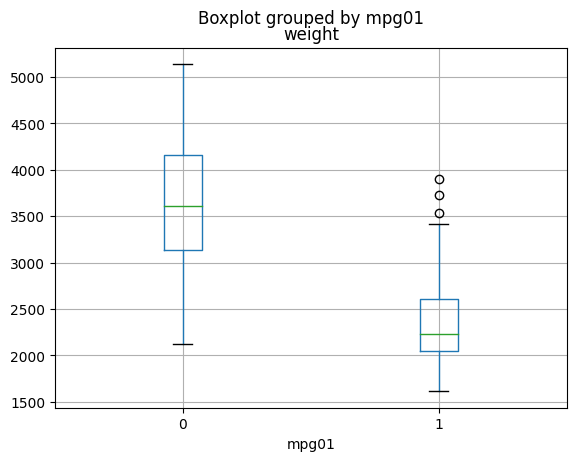

In [122]:
Auto.boxplot(column="weight", by="mpg01");

It seems that smaple `weight` and `horsepower` have very different values depending on the value of mpg01.

## d.

In [123]:
(X_train, X_test, y_train, y_test) = train_test_split(Auto[["weight","horsepower"]], mpg01, test_size=0.5, random_state=0)

In [124]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,79,3
1,21,93


In [125]:
np.mean(lda_pred != y_test)

0.12244897959183673

Test error for LDA is 12.2%

## e.

In [126]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,81,7
1,19,89


In [127]:
np.mean(qda_pred != y_test)

0.1326530612244898

Test error for QDA is 13.3%

## f.

In [128]:
X_train["intercept"] = 1
X_test["intercept"] = 1
X_train

,weight,horsepower,intercept
249,3570,139,1
24,2648,90,1
261,3445,165,1
44,2962,110,1
225,3630,100,1
...,...,...,...
323,2085,48,1
192,3085,90,1
117,2158,75,1
47,3139,88,1


In [129]:
glm = sm.GLM(y_train == "1",X_train,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.071
Date:                Mon, 11 Sep 2023   Deviance:                       106.14
Time:                        16:08:31   Pearson chi2:                     215.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5702
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weight        -0.0033      0.001     -5.104      0.000      -0.005      -0.002
horsepower    -0.0400      0.018     -2.239      0.025      -0.075      -0.005
intercept     13.2118      2.018      6.548      0.000       9.257      17.166
==============================================================================
"""

In [130]:
probs = results.predict(exog=X_test)
labels = np.array(["0"]*X_test.shape[0])
labels[probs>0.5] = "1"
confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,85,10
1,15,86


In [132]:
np.mean(labels != y_test)

0.12755102040816327

Test error for logistic regression is 12.7%

## g.